In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from skimage import io

def narysuj(X,Y):
    plt.plot(X,Y)
    plt.yticks(range(max(Y)+1))
    plt.grid(True, linestyle='--')
    plt.xlim(0,max(X))
    plt.ylim(0,max(Y))
    plt.show()
    
    
def bresenhamLow(x0,y0,x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    yi = 1
    if dy < 0:
        yi = -1
        dy = -dy
    D = 2*dy - dx
    y = y0

    for x in range(x0,x1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            y = y + yi
            D = D - 2*dx
        D = D + 2*dy
    return pikselX,pikselY
    
def bresenhamHigh(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    xi = 1
    if dx < 0:
        xi = -1
        dx = -dx
    D = 2*dx - dy
    x = x0

    for y in range(y0,y1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            x = x + xi
            D = D - 2*dy
        D = D + 2*dx
    return pikselX,pikselY
    

def bresenhamS(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    if abs(y1 - y0) < abs(x1 - x0):
        if x0 > x1:
            
            return bresenhamLow(x1, y1, x0, y0)
        else:
            return bresenhamLow(x0, y0, x1, y1)
    else:
        if y0 > y1:
            return bresenhamHigh(x1, y1, x0, y0)
        else:
            return bresenhamHigh(x0, y0, x1, y1) 
            

def wczytajObraz(nazwaPliku):
    image = io.imread(nazwaPliku)
    #image = rgb2gray(image)
    io.imshow(image)
    return image

from skimage.transform import radon, rescale
obraz = wczytajObraz("tomograf-zdjecia/Kolo.jpg")
print(obraz[200,200])
io.imshow(obraz)

image = io.imread("tomograf-zdjecia/Kolo.jpg", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(obraz, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

[255 255 255]


/home/emsi-iggy/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<Figure size 640x480 with 1 Axes>

<Figure size 800x450 with 2 Axes>

Obraz.shape =  (384, 384, 3)
nowy obraz.shape= (384, 384, 3)
r= 271.5290039756342
iteracja:  0 / 360
alfa =  0.0  stopni
iteracja:  30 / 360
alfa =  29.0  stopni
iteracja:  60 / 360
alfa =  59.0  stopni
iteracja:  90 / 360
alfa =  89.0  stopni
iteracja:  120 / 360
alfa =  119.0  stopni
iteracja:  150 / 360
alfa =  149.0  stopni
iteracja:  180 / 360
alfa =  179.0  stopni
iteracja:  210 / 360
alfa =  209.00000000000003  stopni
iteracja:  240 / 360
alfa =  238.99999999999997  stopni
iteracja:  270 / 360
alfa =  269.0  stopni
iteracja:  300 / 360
alfa =  298.99999999999994  stopni
iteracja:  330 / 360
alfa =  329.0  stopni


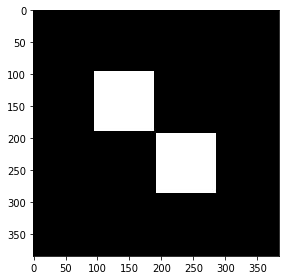

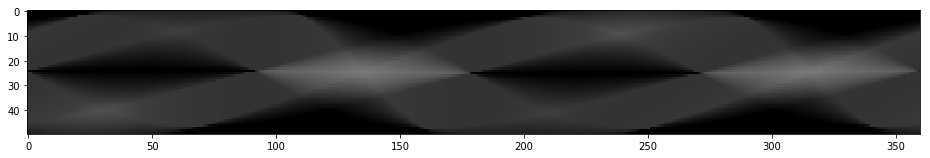

In [7]:
import numpy as np
#import matplotlib.pyplot as plt
#obraz a * a
# r = a * sqrt(2) / 2
# 1 emiter, n - detektorow
# screen (rozmiescic emiter i detektory i tam wgl)
# 
obraz = wczytajObraz("tomograf-zdjecia/Kwadraty2.jpg")
print('Obraz.shape = ',obraz.shape)
if(obraz.shape[0]!=obraz.shape[1]):
    roznica = obraz.shape[0] - obraz.shape[1]
    m = np.zeros((roznica,obraz.shape[0],3))
    print('m.shape=',m.shape)
    #print('m.t=',m.T)
    if(roznica > 0):
        np.concatenate((obraz,m.T),axis=1)
        print('nic')
        
        
print('nowy obraz.shape=',obraz.shape)
r = np.sqrt(obraz.shape[0]**2 + obraz.shape[1]**2)/2
print('r=',r)

##### PARAMETRY #####
alfa = 0 * (np.pi / 180)
Alfa1 = alfa
deltaAlfa = 1
liczbaDetektorow = 50
ileIteracji = int(360 / deltaAlfa)
rozpietosc = 90 * (np.pi / 180)
#stworz sinogram
sinogram = np.zeros([liczbaDetektorow,ileIteracji,3],dtype=np.int64)
sinogram.fill(0)

#fig = plt.figure()
#plt.ion()

for k in range(ileIteracji): #360 i alfa=alfa+deltaAlfa
    if(k % 30==0): 
        print('iteracja: ',k,'/',ileIteracji)
        print('alfa = ',alfa * 180/np.pi,' stopni')
    alfa = (Alfa1 + k*deltaAlfa) * np.pi / 180
    
    emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
    #print('emiter=',emiter)
    emiter[0] = emiter[0] + obraz.shape[0]/2
    emiter[1] = obraz.shape[1]/2-emiter[1]
    #print('emiter=',emiter)
    
    #rozpietosc = 90 * np.pi / 180
    detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

    detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
    detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)
    detektory[0,0] = detektory[0,0] + obraz.shape[0]/2
    detektory[0,1] = obraz.shape[1]/2-detektory[0,1] 

    for i in range(1,liczbaDetektorow):
        detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
        detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))

        detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
        detektory[i,1] = obraz.shape[1]/2-detektory[i,1]  
    #print(detektory)


    wszystkieLinieX = []
    wszystkieLinieY = []
    for i in range(liczbaDetektorow):
        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
        #for j in range(len(l))
        #print('liniaX=',liniaX)
        wszystkieLinieX.append(liniaX)
        wszystkieLinieY.append(liniaY)

    #print(wszystkieLinieX,wszystkieLinieY)

    srednia = []
    for i in range(len(wszystkieLinieX)):
        suma=np.array([0,0,0])
        liczbaElementowWsrodku=0
        for j in range(len(wszystkieLinieX[i])):
            if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]):
                suma += obraz[wszystkieLinieX[i][j],wszystkieLinieY[i][j]]
                liczbaElementowWsrodku += 1
        suma[0] /= liczbaElementowWsrodku
        suma[1] /= liczbaElementowWsrodku
        suma[2] /= liczbaElementowWsrodku
        srednia.append(suma)
    #print(srednia)


    
    for i in range(liczbaDetektorow):
        sinogram[i,k] += srednia[i]
    
    #plt.draw()
    
    #plt.imshow(sinogram, interpolation='nearest')
    #plt.show()
#plt.ioff()
#plt.show()
    

#for i in range(liczbaDetektorow):
#    plt.plot(wszystkieLinieX[i],wszystkieLinieY[i])

#plt.plot(wszystkieLinieX[2],wszystkieLinieY[2])
#plt.plot(wszystkieLinieX[1],wszystkieLinieY[1])
#plt.plot(wszystkieLinieX[0],wszystkieLinieY[0])

#plt.show()
#ticks = np.arange(0,360,step=deltaAlfa)
#plt.xticks(ticks, fontsize=9)
#plt.yticks(np.arange(0,50,step=0.5), fontsize=9)
plt.figure(figsize=(16,20))
plt.imshow(sinogram, interpolation='nearest')
plt.show()

#plt.figure(figsize=(20,30))
#plt.imshow(sinogram, interpolation='none')
#plt.show()
#io.imshow(obraz)

In [22]:
## PARAMETRY DO ODTWORZENIA OBRAZU Z SINOGRAMU (te same) ##
alfa = 0 * (np.pi / 180)
Alfa1 = alfa
deltaAlfa = 1
liczbaDetektorow = 50
ileIteracji = int(360 / deltaAlfa)
rozpietosc = 90 * (np.pi / 180)
# PROGRAM JESZCZE NIE DZIALA...nwm czemu xd

obrazZSinogramu = np.zeros([obraz.shape[0]*2,obraz.shape[1]*2,3],dtype=np.int64)
obrazZSinogramu.fill(0)
for k in range(ileIteracji): #360 i alfa=alfa+deltaAlfa
    if(k % 120==0): 
        print('iteracja: ',k,'/',ileIteracji)
        print('alfa = ',alfa * 180/np.pi,' stopni')
    alfa = (Alfa1 + k*deltaAlfa) * np.pi / 180
    
    emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
    #print('emiter=',emiter)
    emiter[0] = emiter[0] + obraz.shape[0]/2
    emiter[1] = obraz.shape[1]/2-emiter[1]
    #print('emiter=',emiter)
    
    #rozpietosc = 90 * np.pi / 180
    detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

    detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
    detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)
    detektory[0,0] = detektory[0,0] + obraz.shape[0]/2
    detektory[0,1] = obraz.shape[1]/2-detektory[0,1] 

    for i in range(1,liczbaDetektorow):
        detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
        detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))

        detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
        detektory[i,1] = obraz.shape[1]/2-detektory[i,1]  
    #print(detektory)


    wszystkieLinieX = []
    wszystkieLinieY = []
    for i in range(liczbaDetektorow):
        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
        #for j in range(len(l))
        #print('liniaX=',liniaX)
        wszystkieLinieX.append(liniaX)
        wszystkieLinieY.append(liniaY)

    #print(wszystkieLinieX,wszystkieLinieY)

    for i in range(len(wszystkieLinieX)):
        for j in range(len(wszystkieLinieX[i])):
            obrazZSinogramu[i,j] += sinogram[i,k]
            if(np.any(obrazZSinogramu[i,j]>255)): obrazZSinogramu=[255,255,255]
    #if(k%100):
     #   print('ustawiam obrazZSinogramu[',wszystkieLinieX[0],',',wszystkieLinieX[0][j],'] na: ', sinogram[i,k])
            #if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]):
            #    suma += obraz[wszystkieLinieX[i][j],wszystkieLinieY[i][j]]
            #    liczbaElementowWsrodku += 1
        
            #if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]):
             #   suma += obraz[wszystkieLinieX[i][j],wszystkieLinieY[i][j]]
             #   liczbaElementowWsrodku += 1
      #  suma[0] /= liczbaElementowWsrodku
      #  suma[1] /= liczbaElementowWsrodku
      #  suma[2] /= liczbaElementowWsrodku
      #  srednia.append(suma)
    #print(srednia)


    
    #for i in range(liczbaDetektorow):
    #    sinogram[i,k] += srednia[i]

        

#for i in range(liczbaDetektorow):
#    for j in range(ileIteracji):
#        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
#        obrazZSinogramu[i,j] += sinogram[,j*deltaAlfa]

#plt.figure(figsize=(18,24))
plt.imshow(obrazZSinogramu, interpolation='nearest')
plt.show()

iteracja:  0 / 360
alfa =  0.0  stopni


TypeError: list indices must be integers or slices, not tuple

In [21]:
for i in range(sinogram.shape[0]):
    for j in range(sinogram.shape[1]):
        print(np.array(sinogram[i,j]))

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[8 8 8]
[16 16 16]
[19 19 19]
[22 22 22]
[24 24 24]
[26 26 26]
[28 28 28]
[28 28 28]
[29 29 29]
[30 30 30]
[29 29 29]
[31 31 31]
[32 32 32]
[32 32 32]
[31 31 31]
[31 31 31]
[32 32 32]
[31 31 31]
[31 31 31]
[32 32 32]
[32 32 32]
[32 32 32]
[32 32 32]
[32 32 32]
[33 33 33]
[33 33 33]
[32 32 32]
[33 33 33]
[32 32 32]
[33 33 33]
[33 33 33]
[32 32 32]
[32 32 32]
[32 32 32]
[33 33 33]
[33 33 33]
[33 33 33]
[32 32 32]
[32 32 32]
[33 33 33]
[33 33 33]
[32 32 32]
[32 32 32]
[33 33 33]
[33 33 33]
[33 33 33]
[32 32 32]
[32 32 32]
[32 32 32]
[33 33 33]
[33 33 33]
[32 32 32]
[33 33 33]
[32 32 32]
[33 33 33]
[33 33 33]
[32 32 32]
[32 32 32]
[32 32 32]
[32 32 32]
[32 32 32]
[31 31 31]
[31 31 31]
[32 32 32]
[31 31 31]
[31 31 31]
[32 32 32]
[32 32 32]
[31 31 31]
[29 29 29]
[30 30 30

[50 50 50]
[50 50 50]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[53 53 53]
[53 53 53]
[53 53 53]
[38 38 38]
[31 31 31]
[27 27 27]
[18 18 18]
[15 15 15]
[12 12 12]
[10 10 10]
[9 9 9]
[6 6 6]
[5 5 5]
[4 4 4]
[3 3 3]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1 1 1]
[1 1 1]
[1 1 1]
[6 6 6]
[6 6 6]
[9 9 9]
[15 15 15]
[25 25 25]
[41 41 41]

[56 56 56]
[55 55 55]
[56 56 56]
[55 55 55]
[56 56 56]
[56 56 56]
[56 56 56]
[55 55 55]
[56 56 56]
[55 55 55]
[56 56 56]
[56 56 56]
[56 56 56]
[56 56 56]
[56 56 56]
[55 55 55]
[55 55 55]
[54 54 54]
[53 53 53]
[53 53 53]
[52 52 52]
[52 52 52]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[53 53 53]
[53 53 53]
[53 53 53]
[53 53 53]
[53 53 53]
[54 54 54]
[54 54 54]
[50 50 50]
[44 44 44]
[40 40 40]
[37 37 37]
[33 33 33]
[30 30 30]
[27 27 27]
[24 24 24]
[21 21 21]
[19 19 19]
[17 17 17]
[15 15 15]
[14 14 14]
[12 12 12]
[10 10 10]
[9 9 9]
[7 7 7]
[6 6 6]
[5 5 5]
[4 4 4]
[4 4 4]
[2 2 2]
[1 1 1]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]

[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[53 53 53]
[53 53 53]
[54 54 54]
[54 54 54]
[55 55 55]
[56 56 56]
[57 57 57]
[57 57 57]
[58 58 58]
[59 59 59]
[60 60 60]
[60 60 60]
[60 60 60]
[60 60 60]
[60 60 60]
[59 59 59]
[60 60 60]
[60 60 60]
[58 58 58]
[58 58 58]
[57 57 57]
[56 56 56]
[55 55 55]
[55 55 55]
[54 54 54]
[53 53 53]
[53 53 53]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]

[59 59 59]
[59 59 59]
[60 60 60]
[60 60 60]
[61 61 61]
[61 61 61]
[63 63 63]
[64 64 64]
[65 65 65]
[66 66 66]
[68 68 68]
[70 70 70]
[70 70 70]
[70 70 70]
[70 70 70]
[70 70 70]
[71 71 71]
[70 70 70]
[70 70 70]
[70 70 70]
[70 70 70]
[70 70 70]
[70 70 70]
[70 70 70]
[69 69 69]
[68 68 68]
[67 67 67]
[65 65 65]
[64 64 64]
[62 62 62]
[61 61 61]
[61 61 61]
[60 60 60]
[60 60 60]
[59 59 59]
[59 59 59]
[58 58 58]
[58 58 58]
[57 57 57]
[57 57 57]
[57 57 57]
[56 56 56]
[56 56 56]
[56 56 56]
[55 55 55]
[55 55 55]
[55 55 55]
[54 54 54]
[54 54 54]
[54 54 54]
[54 54 54]
[53 53 53]
[53 53 53]
[53 53 53]
[53 53 53]
[53 53 53]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[48 48 48]
[45 45 45]
[42 42 42]
[40 40 40]
[37 37 37]
[34 34 34]
[32 32 32]
[31 31 31]
[29 29 29]

[32 32 32]
[32 32 32]
[33 33 33]
[33 33 33]
[34 34 34]
[33 33 33]
[34 34 34]
[33 33 33]
[34 34 34]
[35 35 35]
[36 36 36]
[35 35 35]
[35 35 35]
[35 35 35]
[36 36 36]
[37 37 37]
[37 37 37]
[39 39 39]
[42 42 42]
[43 43 43]
[46 46 46]
[49 49 49]
[51 51 51]
[54 54 54]
[57 57 57]
[56 56 56]
[56 56 56]
[55 55 55]
[55 55 55]
[55 55 55]
[55 55 55]
[54 54 54]
[54 54 54]
[54 54 54]
[54 54 54]
[53 53 53]
[53 53 53]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[51 51 51]
[50 50 50]
[49 49 49]
[47 47 47]
[45 45 45]
[45 45 45]
[44 44 44]
[42 42 42]
[41 41 41]
[40 40 40]
[40 40 40]
[40 40 40]
[40 40 40]
[38 38 38]
[39 39 39]
[39 39 39]
[38 38 38]
[38 38 38]

[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[50 50 50]
[48 48 48]
[46 46 46]
[44 44 44]
[42 42 42]
[42 42 42]
[40 40 40]
[39 39 39]
[37 37 37]
[37 37 37]
[36 36 36]
[34 34 34]
[35 35 35]
[34 34 34]
[33 33 33]
[32 32 32]
[31 31 31]
[31 31 31]
[30 30 30]
[31 31 31]
[30 30 30]
[30 30 30]
[30 30 30]
[29 29 29]
[30 30 30]
[30 30 30]
[30 30 30]
[30 30 30]
[30 30 30]
[30 30 30]
[31 31 31]
[31 31 31]
[31 31 31]
[32 32 32]
[32 32 32]
[33 33 33]
[34 34 34]
[35 35 35]
[35 35 35]
[36 36 36]
[37 37 37]
[39 39 39]
[40 40 40]
[42 42 42]
[43 43 43]
[45 45 45]
[47 47 47]
[49 49 49]
[50 50 50]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]

[77 77 77]
[75 75 75]
[73 73 73]
[73 73 73]
[71 71 71]
[69 69 69]
[67 67 67]
[66 66 66]
[64 64 64]
[62 62 62]
[59 59 59]
[57 57 57]
[55 55 55]
[53 53 53]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[53 53 53]
[53 53 53]
[53 53 53]
[53 53 53]
[53 53 53]
[51 51 51]
[50 50 50]
[47 47 47]
[44 44 44]
[43 43 43]
[42 42 42]
[40 40 40]
[39 39 39]
[38 38 38]
[37 37 37]
[36 36 36]
[35 35 35]
[35 35 35]
[34 34 34]
[33 33 33]
[33 33 33]
[32 32 32]
[31 31 31]
[31 31 31]
[30 30 30]
[30 30 30]
[29 29 29]
[30 30 30]
[30 30 30]
[30 30 30]
[29 29 29]
[30 30 30]
[29 29 29]
[29 29 29]
[30 30 30]
[30 30 30]
[30 30 30]
[29 29 29]
[30 30 30]
[30 30 30]
[31 31 31]
[31 31 31]
[32 32 32]
[32 32 32]
[33 33 33]

[26 26 26]
[27 27 27]
[28 28 28]
[29 29 29]
[31 31 31]
[31 31 31]
[33 33 33]
[34 34 34]
[36 36 36]
[37 37 37]
[40 40 40]
[43 43 43]
[45 45 45]
[48 48 48]
[52 52 52]
[52 52 52]
[52 52 52]
[52 52 52]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[55 55 55]
[59 59 59]
[60 60 60]
[64 64 64]
[66 66 66]
[68 68 68]
[71 71 71]
[72 72 72]
[74 74 74]
[75 75 75]
[77 77 77]
[78 78 78]
[80 80 80]
[82 82 82]
[83 83 83]
[84 84 84]
[85 85 85]
[86 86 86]
[87 87 87]
[88 88 88]
[90 90 90]
[91 91 91]
[91 91 91]
[90 90 90]
[88 88 88]
[88 88 88]
[87 87 87]
[87 87 87]
[89 89 89]
[89 89 89]
[90 90 90]
[91 91 91]
[91 91 91]
[92 92 92]
[94 94 94]
[95 95 95]
[95 95 95]
[96 96 96]
[97 97 97]
[97 97 97]
[96 96 96]
[95 95 95]
[93 93 93]
[93 93 93]
[91 91 91]
[90 90 90]
[88 88 88]
[87 87 87]
[87 87 87]
[85 85 85]

[3 3 3]
[3 3 3]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[2 2 2]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[2 2 2]
[2 2 2]
[1 1 1]
[2 2 2]
[2 2 2]
[3 3 3]
[2 2 2]
[4 4 4]
[3 3 3]
[4 4 4]
[3 3 3]
[5 5 5]
[4 4 4]
[6 6 6]
[6 6 6]
[6 6 6]
[7 7 7]
[8 8 8]
[10 10 10]
[11 11 11]
[13 13 13]
[16 16 16]
[20 20 20]
[27 27 27]
[40 40 40]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[51 51 51]
[57 57 57]
[66 66 66]
[70 70 70]
[75 75 75]
[78 78 78]
[81 81 81]
[83 83 83]
[85 85 85]
[86 86 86]
[88 88 88]
[90 90 90]
[90 90 90]
[92 92 92]
[92 92 92]
[94 94 94]
[95 95 95]
[96 96 96]
[96 96 96]
[97 97 97]
[98 98 98]
[99 99 99]
[100 100 100]
[101 101 101]
[102 102 102]
[102 102 102]
[103 103 103]
[104 104 104]
[105 105 105]
[105 105 105]
[107 107 107]
[107 107 107]
[108 108 108]
[109 109 109]
[1

KeyboardInterrupt: 

In [62]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])
print('a.shape=',a.shape)
print('b.shape=',b.shape)
print(np.concatenate((a,b.T),axis=1))

a.shape= (2, 2)
b.shape= (1, 2)
[[1 2 5]
 [3 4 6]]


In [9]:
#wx,wy = bresenhamS(-400,0,0,400)
#for i in range(len(wx)):
#    print(wx[i],",",wy[i])
#print(wx,"\n",wy)
print(len(wszystkieLinieX[0]))
print(wszystkieLinieX[0][1])

480
-16
